In [1]:
import torch
import numpy as np
import torch.nn as nn

\begin{align}
y_1 = 2x_1^2 + 3x_2^2 -7x_3^2 -5x_1 + 11x_2 + 2x_3 + 3
\end{align}


\begin{align}
y_2 = 13x_1^2 - 11x_2^2 +7x_3^2 +2x_1 + 19x_2 - 13x_3 + 5
\end{align}

In [2]:
def generate_data(low = 0.0, high = 1.0, n=100, d=3):
    np.random.seed(73)
    return np.random.uniform(low, high, (n,d))

def quadratic_func(x, sq_coef, li_coef, bias):
    """Outputs a quadratic function with n variables  
    (based on dimension of ndarray and value of coefficients passed). 
    The number of dimensions and the number of coefficients should match"""
    sq_x = np.square(x)
    return sq_x @ sq_coef.T + x @ li_coef.T + bias
    
x = generate_data(-1.0,1.0,300, 3)

y1 = quadratic_func(x, np.array([[2,3,-7]]), np.array([[-5,11,2]]), 3)
y2 = quadratic_func(x, np.array([[13,-11,7]]), np.array([[2,19,-13]]), 5)

In [3]:
def plot_4d(x1,x2,x3,y_true,y_pred=None):
    %matplotlib inline
    %matplotlib notebook

    from matplotlib import cm
    from matplotlib import colors
    from mpl_toolkits import mplot3d
    import matplotlib.pyplot as plt

    plt.rcParams["figure.figsize"] = 17, 10
    ax = plt.axes(projection='3d')
    
    max_y = np.max(y_true)
    min_y = np.min(y_true)
    
    if y_pred is not None:
        mx_pred = np.max(y_pred)
        mn_pred = np.min(y_pred)
        if mx_pred > max_y:
            max_y = mx_pred
        if mn_pred < min_y:
            min_y = mn_pred
    
    cmap = cm.get_cmap('seismic')
    norm = colors.Normalize(vmin=min_y,vmax=max_y)
    print(f'max : {max_y}  min : {min_y}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    sc1 = ax.scatter(x1, x2, x3,s=np.square(y_true[:,0] + 2),c=y_true[:,0] ,norm=norm, cmap=cmap)
    cb1 = plt.colorbar(sc1)
    cb1.set_label('y_true')
    if y_pred is not None:
        cmap2 = cm.get_cmap('PRGn')
        sc2 = ax.scatter(x1, x2, x3,s=np.square(y_pred[:,0] + 2),c=y_pred[:,0] ,norm=norm, cmap=cmap2)
        cb2 = plt.colorbar(sc2)
        cb2.set_label('y_pred')
#     sc = ax.scatter(x[:,0], x[:,1], x[:,2],s=np.square(y1[:,0] + 2),c=y1[:,0] ,norm=norm, cmap=cmap)
    plt.xlabel='x1'
    plt.ylabel='x2'
    plt.zlabel='x3'

<IPython.core.display.Javascript object>


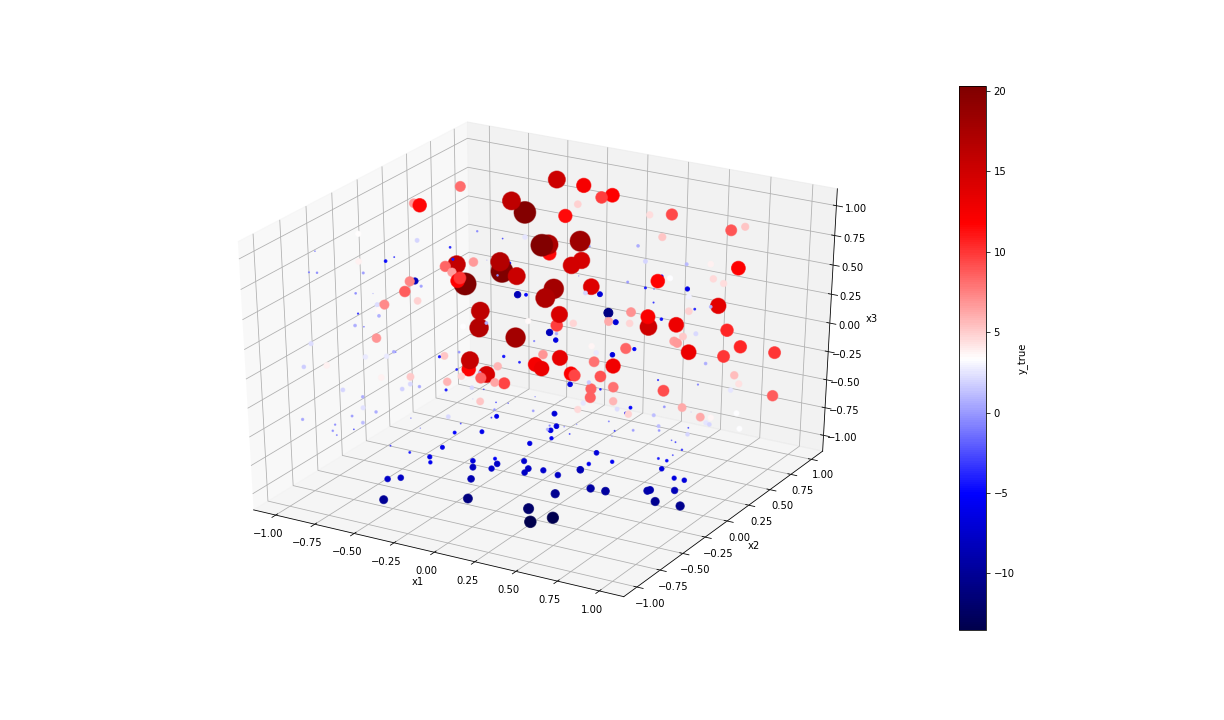

max : 20.284099794015997  min : -13.5285978007839


In [20]:
plot_4d(x[:,0], x[:,1], x[:,2], y1)

<IPython.core.display.Javascript object>


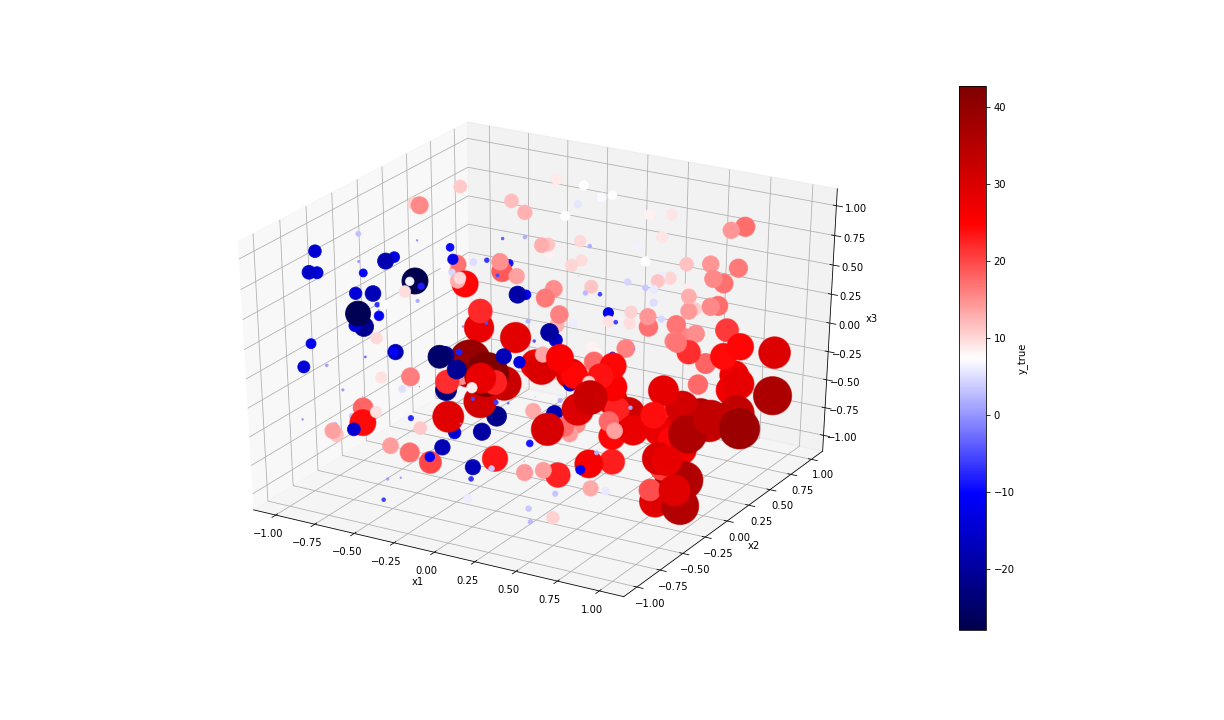

max : 42.6099130903702  min : -27.935697967500786


In [5]:
plot_4d(x[:,0], x[:,1], x[:,2], y2)

In [6]:
y_true = np.concatenate((y1,y2), axis=1)
print(x.shape)
print(y_true.shape)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()

(300, 3)
(300, 2)


In [10]:
class Model(nn.Module):
    def __init__(self, input_dim, num_neurons):
        super().__init__()
        self.linear_ip = nn.Linear(input_dim, num_neurons)
        self.relu1   = nn.ReLU()
        self.linear2 = nn.Linear(num_neurons, 4)
        self.relu2   = nn.ReLU()
        self.linear_op = nn.Linear(4, 2)
    
    def forward(self, x):
        l1 = self.linear_ip(x)
        r1 = self.relu1(l1)
        l2 = self.linear2(r1)
        r2 = self.relu2(l2)
        l3 = self.linear_op(r2)
        return l3
    
class MSE:
    def __call__(self, y_true, y_pred):
        self.y_pred = y_pred
        self.y_true = y_true
        # MSE = (delta_y1^2/n + delta_y2^2/n + ...delta_yn^2/n)
        return ((self.y_pred - self.y_true)**2).mean()

In [15]:
def fit(x, y_true, model, loss, lr=0.01, num_epoch=1000):
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epoch):
        optimizer.zero_grad()
        y_pred = model(x)
        loss_val = loss(y_true, y_pred)
        print(f'Epoch {epoch}, loss {loss_val}')
        loss_val.backward()
        optimizer.step()

In [16]:
loss = nn.MSELoss()
model = Model(x_tensor.shape[1], 5)
fit(x_tensor, y_true_tensor, model, loss)

Epoch 0, loss 181.21551513671875
Epoch 1, loss 180.3457794189453
Epoch 2, loss 179.45028686523438
Epoch 3, loss 178.55865478515625
Epoch 4, loss 177.675537109375
Epoch 5, loss 176.79689025878906
Epoch 6, loss 175.9188232421875
Epoch 7, loss 175.0371856689453
Epoch 8, loss 174.14784240722656
Epoch 9, loss 173.24642944335938
Epoch 10, loss 172.32797241210938
Epoch 11, loss 171.3876495361328
Epoch 12, loss 170.41961669921875
Epoch 13, loss 169.4172821044922
Epoch 14, loss 168.3734893798828
Epoch 15, loss 167.2798309326172
Epoch 16, loss 166.12716674804688
Epoch 17, loss 164.9038543701172
Epoch 18, loss 163.59608459472656
Epoch 19, loss 162.18753051757812
Epoch 20, loss 160.65451049804688
Epoch 21, loss 158.96661376953125
Epoch 22, loss 157.08377075195312
Epoch 23, loss 154.94979858398438
Epoch 24, loss 152.48548889160156
Epoch 25, loss 149.5803985595703
Epoch 26, loss 146.02259826660156
Epoch 27, loss 141.5668182373047
Epoch 28, loss 135.92955017089844
Epoch 29, loss 128.8358917236328
Epo

Epoch 267, loss 11.132975578308105
Epoch 268, loss 11.113005638122559
Epoch 269, loss 11.093329429626465
Epoch 270, loss 11.071554183959961
Epoch 271, loss 11.048887252807617
Epoch 272, loss 11.026976585388184
Epoch 273, loss 11.004133224487305
Epoch 274, loss 10.98005199432373
Epoch 275, loss 10.956867218017578
Epoch 276, loss 10.934441566467285
Epoch 277, loss 10.912483215332031
Epoch 278, loss 10.8907470703125
Epoch 279, loss 10.8690824508667
Epoch 280, loss 10.84761905670166
Epoch 281, loss 10.826285362243652
Epoch 282, loss 10.80517864227295
Epoch 283, loss 10.784354209899902
Epoch 284, loss 10.76345157623291
Epoch 285, loss 10.742655754089355
Epoch 286, loss 10.721702575683594
Epoch 287, loss 10.700695991516113
Epoch 288, loss 10.679461479187012
Epoch 289, loss 10.656527519226074
Epoch 290, loss 10.633981704711914
Epoch 291, loss 10.6115083694458
Epoch 292, loss 10.589122772216797
Epoch 293, loss 10.566875457763672
Epoch 294, loss 10.544528007507324
Epoch 295, loss 10.52207183837

Epoch 542, loss 3.8280868530273438
Epoch 543, loss 3.8193893432617188
Epoch 544, loss 3.8106849193573
Epoch 545, loss 3.800804376602173
Epoch 546, loss 3.791186571121216
Epoch 547, loss 3.781818151473999
Epoch 548, loss 3.772698163986206
Epoch 549, loss 3.763742208480835
Epoch 550, loss 3.7541329860687256
Epoch 551, loss 3.7444393634796143
Epoch 552, loss 3.7349934577941895
Epoch 553, loss 3.7257795333862305
Epoch 554, loss 3.7167837619781494
Epoch 555, loss 3.7079975605010986
Epoch 556, loss 3.6994054317474365
Epoch 557, loss 3.69096302986145
Epoch 558, loss 3.6826164722442627
Epoch 559, loss 3.6744072437286377
Epoch 560, loss 3.6662275791168213
Epoch 561, loss 3.658163547515869
Epoch 562, loss 3.650144100189209
Epoch 563, loss 3.6420891284942627
Epoch 564, loss 3.6338961124420166
Epoch 565, loss 3.625906467437744
Epoch 566, loss 3.6180927753448486
Epoch 567, loss 3.6103832721710205
Epoch 568, loss 3.6021833419799805
Epoch 569, loss 3.5941922664642334
Epoch 570, loss 3.586373329162597

Epoch 864, loss 3.2727322578430176
Epoch 865, loss 3.2206733226776123
Epoch 866, loss 3.0685818195343018
Epoch 867, loss 3.0257060527801514
Epoch 868, loss 2.913273572921753
Epoch 869, loss 2.879408597946167
Epoch 870, loss 2.8016409873962402
Epoch 871, loss 2.774393320083618
Epoch 872, loss 2.7232534885406494
Epoch 873, loss 2.7009871006011963
Epoch 874, loss 2.661534309387207
Epoch 875, loss 2.6431169509887695
Epoch 876, loss 2.6142044067382812
Epoch 877, loss 2.5988144874572754
Epoch 878, loss 2.576174736022949
Epoch 879, loss 2.56565260887146
Epoch 880, loss 2.547528028488159
Epoch 881, loss 2.5405960083007812
Epoch 882, loss 2.5257763862609863
Epoch 883, loss 2.520829200744629
Epoch 884, loss 2.511098861694336
Epoch 885, loss 2.507382392883301
Epoch 886, loss 2.499518632888794
Epoch 887, loss 2.4969499111175537
Epoch 888, loss 2.4906845092773438
Epoch 889, loss 2.4892261028289795
Epoch 890, loss 2.4843590259552
Epoch 891, loss 2.4847469329833984
Epoch 892, loss 2.4811201095581055


In [17]:
y_pred_tensor = model(x_tensor)
y_pred = y_pred_tensor.detach().numpy()
y1_pred = y_pred[:,0].reshape(300,1)
y2_pred = y_pred[:,1].reshape(300,1)

<IPython.core.display.Javascript object>


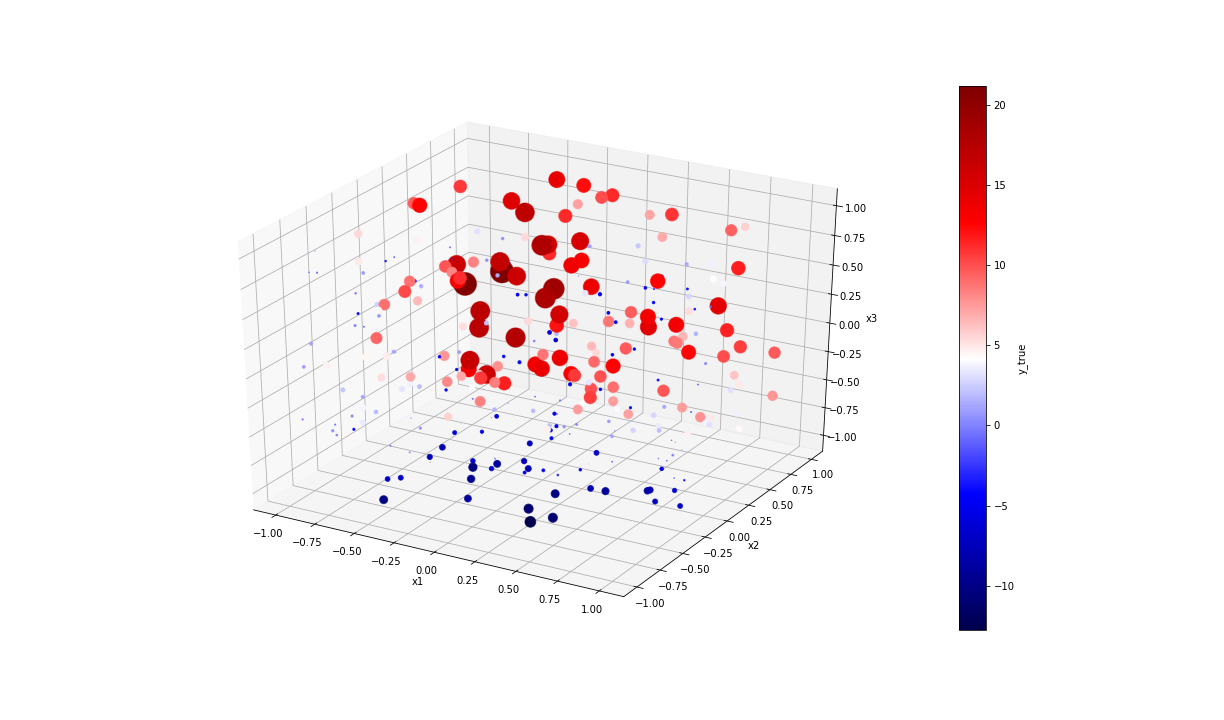

max : 21.158857345581055  min : -12.766637802124023


In [18]:
plot_4d(x[:,0], x[:,1], x[:,2], y1_pred)

<IPython.core.display.Javascript object>


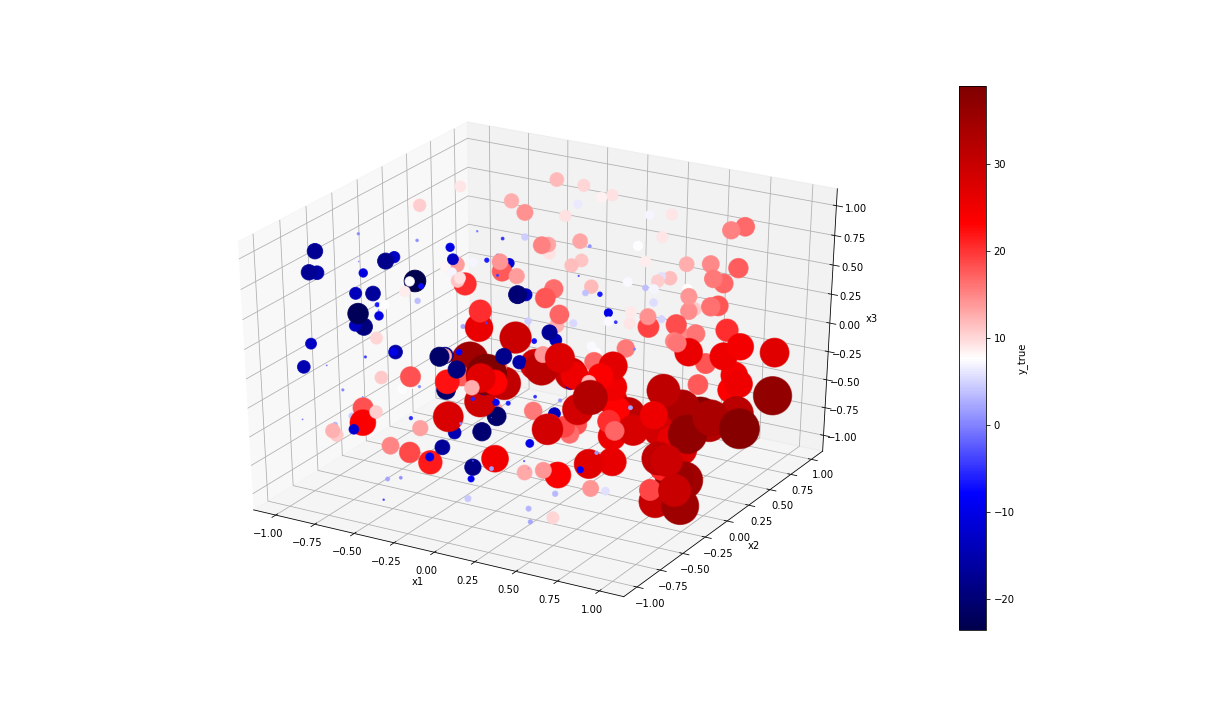

max : 38.9493293762207  min : -23.57386016845703


In [19]:
plot_4d(x[:,0], x[:,1], x[:,2], y2_pred)